<a href="https://colab.research.google.com/github/Riniii09/NLP-Mini-Project/blob/main/NLP_Mini_Project_Part_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members:

Shivashankar Meganathan

Rini Pillai

Sakshi Shewale

Anugrah Shibu



In [ ]:
# Section One
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("nlpp.csv")

# Display the first few rows to understand the structure
df.head()

,Sr.no,Statements,Category
0,1,The lender shall provide a grace period of 15 ...,Beneficial
1,2,The insured shall have the right to reinstate ...,Beneficial
2,3,The borrower may request an extension of the l...,Beneficial
3,4,Prepayment of the loan shall be allowed withou...,Beneficial
4,5,The insurer guarantees coverage for all pre-ex...,Beneficial


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sr.no       1640 non-null   int64 
 1   Statements  1640 non-null   object
 2   Category    1640 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.6+ KB
None
             Sr.no
count  1640.000000
mean    820.500000
std     473.571536
min       1.000000
25%     410.750000
50%     820.500000
75%    1230.250000
max    1640.000000


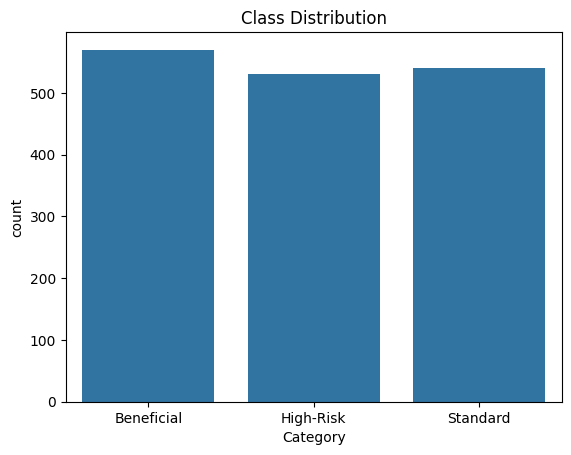

Sr.no         0
Statements    0
Category      0
dtype: int64


In [ ]:
# Section Two
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='Category', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())

In [ ]:
# Section Three
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Statements'].apply(clean_text)

# Display cleaned text
df[['Statements', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Statements,cleaned_text
0,The lender shall provide a grace period of 15 ...,the lender shall provide a grace period of da...
1,The insured shall have the right to reinstate ...,the insured shall have the right to reinstate ...
2,The borrower may request an extension of the l...,the borrower may request an extension of the l...
3,Prepayment of the loan shall be allowed withou...,prepayment of the loan shall be allowed withou...
4,The insurer guarantees coverage for all pre-ex...,the insurer guarantees coverage for all preexi...


In [ ]:
# Section Four
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,char_count,word_count,avg_word_length,stopword_count,htag_count
0,96,16,5.000000,6,0
1,105,18,4.833333,7,0
2,98,17,4.823529,7,0
3,88,15,4.866667,6,0
4,91,13,6.076923,5,0


In [ ]:
# Section Five

!pip install fasttext

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

!gunzip cc.en.300.bin.gz

# Student Code: Generate Bag of Words, TFIDF, and FastText features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (example using pre-trained FastText model)
ft_model = fasttext.load_model('cc.en.300.bin')

def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)

df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313473 sha256=2592b3c8bf342ffd0c8f5a188a1477b70461fe55c325b1d23800f4caa54df41d
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext
--2025-03-16 17:42:40--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.115, 18.238.176.44, 18.238.176.126, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45

In [ ]:
df['fasttext_embeddings'].head()

,fasttext_embeddings
0,"[0.010462151, -0.029530581, -0.016049886, 0.01..."
1,"[-0.005392777, 0.033904567, 0.009982693, 0.004..."
2,"[0.011355316, -0.01600875, -0.020716306, 0.037..."
3,"[0.0034751683, -0.024917204, 0.008294792, 0.01..."
4,"[0.019370101, -0.012347262, -0.009262543, 0.03..."


In [ ]:
# Section Six
# Student Code: Train Models on NLP Features (char_count, word_count, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Random Forest as an example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

  Beneficial       0.62      0.62      0.62       128
   High-Risk       0.80      0.59      0.68       103
    Standard       0.48      0.61      0.54        97

    accuracy                           0.61       328
   macro avg       0.63      0.61      0.61       328
weighted avg       0.64      0.61      0.62       328



In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# SVM with Linear Kernel (Improved)
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(classification_report(y_test, svm_pred))

# Logistic Regression (More Iterations for Stability)
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(classification_report(y_test, lr_pred))

# Decision Tree with Random State
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(classification_report(y_test, dt_pred))

# Naive Bayes - Fixing .toarray() Issue
nb = GaussianNB()
nb.fit(X_train.values, y_train)  # Convert DataFrame to NumPy array
nb_pred = nb.predict(X_test.values)  # Convert DataFrame to NumPy array
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_pred):.4f}")
print(classification_report(y_test, nb_pred))

# K-Nearest Neighbors (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(classification_report(y_test, knn_pred))


SVM Accuracy: 0.6799
              precision    recall  f1-score   support

  Beneficial       0.69      0.76      0.72       128
   High-Risk       0.85      0.64      0.73       103
    Standard       0.55      0.62      0.58        97

    accuracy                           0.68       328
   macro avg       0.69      0.67      0.68       328
weighted avg       0.70      0.68      0.68       328

Logistic Regression Accuracy: 0.6707
              precision    recall  f1-score   support

  Beneficial       0.71      0.76      0.73       128
   High-Risk       0.77      0.67      0.72       103
    Standard       0.53      0.56      0.55        97

    accuracy                           0.67       328
   macro avg       0.67      0.66      0.66       328
weighted avg       0.68      0.67      0.67       328

Decision Tree Accuracy: 0.6067
              precision    recall  f1-score   support

  Beneficial       0.61      0.65      0.63       128
   High-Risk       0.78      0.58      0

In [ ]:
# Section Seven
# Train models on Bag of Words (BoW), TFIDF, and FastText features
# Example for Bag of Words
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Repeat for TFIDF and FastText embeddings
# Example for TFIDF embeddings
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Example for FastText embeddings
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

BoW Accuracy: 0.9786585365853658
              precision    recall  f1-score   support

  Beneficial       0.98      0.98      0.98       128
   High-Risk       0.96      0.97      0.97       103
    Standard       0.99      0.99      0.99        97

    accuracy                           0.98       328
   macro avg       0.98      0.98      0.98       328
weighted avg       0.98      0.98      0.98       328

TFIDF Accuracy: 0.975609756097561
              precision    recall  f1-score   support

  Beneficial       0.98      0.98      0.98       128
   High-Risk       0.96      0.96      0.96       103
    Standard       0.99      0.99      0.99        97

    accuracy                           0.98       328
   macro avg       0.98      0.98      0.98       328
weighted avg       0.98      0.98      0.98       328

FastText Accuracy: 0.9634146341463414
              precision    recall  f1-score   support

  Beneficial       0.97      0.95      0.96       128
   High-Risk       0.97 

In [ ]:
# Training log reg on Bag of Words (BoW), TFIDF, and FastText features

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

BoW Accuracy: 0.975609756097561
              precision    recall  f1-score   support

  Beneficial       0.98      0.98      0.98       128
   High-Risk       0.97      0.96      0.97       103
    Standard       0.98      0.98      0.98        97

    accuracy                           0.98       328
   macro avg       0.98      0.97      0.98       328
weighted avg       0.98      0.98      0.98       328

TFIDF Accuracy: 0.9725609756097561
              precision    recall  f1-score   support

  Beneficial       0.98      0.98      0.98       128
   High-Risk       0.96      0.96      0.96       103
    Standard       0.97      0.98      0.97        97

    accuracy                           0.97       328
   macro avg       0.97      0.97      0.97       328
weighted avg       0.97      0.97      0.97       328

FastText Accuracy: 0.9329268292682927
              precision    recall  f1-score   support

  Beneficial       0.95      0.93      0.94       128
   High-Risk       0.94 

In [ ]:
# Section Eight
# Training svm on Bag of Words (BoW), TFIDF, and FastText features
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

BoW Accuracy: 0.975609756097561
              precision    recall  f1-score   support

  Beneficial       0.98      0.98      0.98       128
   High-Risk       0.96      0.96      0.96       103
    Standard       0.98      0.99      0.98        97

    accuracy                           0.98       328
   macro avg       0.98      0.98      0.98       328
weighted avg       0.98      0.98      0.98       328

TFIDF Accuracy: 0.9786585365853658
              precision    recall  f1-score   support

  Beneficial       0.99      0.98      0.98       128
   High-Risk       0.97      0.97      0.97       103
    Standard       0.97      0.99      0.98        97

    accuracy                           0.98       328
   macro avg       0.98      0.98      0.98       328
weighted avg       0.98      0.98      0.98       328

FastText Accuracy: 0.9603658536585366
              precision    recall  f1-score   support

  Beneficial       0.97      0.95      0.96       128
   High-Risk       0.99 

In [ ]:
# Section Nine
# Training dec tree on Bag of Words (BoW), TFIDF, and FastText features
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

BoW Accuracy: 0.926829268292683
              precision    recall  f1-score   support

  Beneficial       0.92      0.96      0.94       128
   High-Risk       0.93      0.85      0.89       103
    Standard       0.94      0.96      0.95        97

    accuracy                           0.93       328
   macro avg       0.93      0.92      0.93       328
weighted avg       0.93      0.93      0.93       328

TFIDF Accuracy: 0.9298780487804879
              precision    recall  f1-score   support

  Beneficial       0.91      0.98      0.94       128
   High-Risk       0.95      0.84      0.89       103
    Standard       0.95      0.95      0.95        97

    accuracy                           0.93       328
   macro avg       0.93      0.93      0.93       328
weighted avg       0.93      0.93      0.93       328

FastText Accuracy: 0.8780487804878049
              precision    recall  f1-score   support

  Beneficial       0.89      0.91      0.90       128
   High-Risk       0.84 

In [ ]:
# Training knn on Bag of Words (BoW), TFIDF, and FastText features
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

BoW Accuracy: 0.948170731707317
              precision    recall  f1-score   support

  Beneficial       0.98      0.93      0.96       128
   High-Risk       0.93      0.96      0.95       103
    Standard       0.92      0.96      0.94        97

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328

TFIDF Accuracy: 0.9573170731707317
              precision    recall  f1-score   support

  Beneficial       0.98      0.96      0.97       128
   High-Risk       0.93      0.96      0.95       103
    Standard       0.95      0.95      0.95        97

    accuracy                           0.96       328
   macro avg       0.96      0.96      0.96       328
weighted avg       0.96      0.96      0.96       328

FastText Accuracy: 0.9054878048780488
              precision    recall  f1-score   support

  Beneficial       0.93      0.93      0.93       128
   High-Risk       0.88 

In [ ]:
# Training naive bayes on Bag of Words (BoW), TFIDF, and FastText features
X_train, X_test, y_train, y_test = train_test_split(X_bow.toarray(), y, test_size=0.2, random_state=42)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'BoW Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'TFIDF Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['fasttext_embeddings']), y, test_size=0.2, random_state=42)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'FastText Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

BoW Accuracy: 0.9146341463414634
              precision    recall  f1-score   support

  Beneficial       0.98      0.95      0.96       128
   High-Risk       0.84      0.94      0.89       103
    Standard       0.92      0.85      0.88        97

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.92      0.91      0.92       328

TFIDF Accuracy: 0.875
              precision    recall  f1-score   support

  Beneficial       0.94      0.93      0.94       128
   High-Risk       0.82      0.87      0.85       103
    Standard       0.85      0.80      0.83        97

    accuracy                           0.88       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.88      0.88      0.88       328

FastText Accuracy: 0.9207317073170732
              precision    recall  f1-score   support

  Beneficial       0.94      0.94      0.94       128
   High-Risk       0.91      0.88   

In [ ]:
# Section Ten
# Student Code: Train Models on Combined Features (NLP + TFIDF)
from scipy.sparse import hstack

# Combine NLP features and TFIDF features
X_combined = hstack([X, X_tfidf])

# Train model and evaluate
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Combined Features Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Accuracy: 0.9695121951219512


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(f'Combined Features SVM Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features SVM Accuracy: 0.9817073170731707


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'Combined Features Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Decision Tree Accuracy: 0.9420731707317073


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Combined Features Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Logistic Regression Accuracy: 0.9786585365853658


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'Combined Features KNN Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features KNN Accuracy: 0.5914634146341463


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
nb.fit(X_train.toarray(), y_train)
y_pred = nb.predict(X_test.toarray())
print(f'Combined Features Naive Bayes Accuracy: {accuracy_score(y_test, y_pred)}')

Combined Features Naive Bayes Accuracy: 0.8780487804878049


In [ ]:
import joblib
import numpy as np
from scipy.sparse import hstack  # To handle feature mismatch if necessary

# ✅ Load the trained model and vectorizer together
loaded_model, loaded_vectorizer = joblib.load('text_classification_model.pkl')

# ✅ New text input
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]  # Ensure `clean_text` function is correctly defined

# ✅ Use the exact same vectorizer without refitting
new_text_features = loaded_vectorizer.transform(new_text_cleaned)

# ✅ Check for feature consistency
expected_features = loaded_model.n_features_in_
actual_features = new_text_features.shape[1]

print(f"Model expects {expected_features} features, input has {actual_features} features.")

# 🚨 Handle Feature Mismatch
if actual_features < expected_features:
    diff = expected_features - actual_features
    extra_features = np.zeros((new_text_features.shape[0], diff))  # Pad missing features
    new_text_features = hstack([new_text_features, extra_features])

elif actual_features > expected_features:
    print("⚠️ More features than expected! Ensure vectorizer is not refitted.")

# ✅ Predict if features match
if new_text_features.shape[1] == expected_features:
    prediction = loaded_model.predict(new_text_features)
    print(f'Prediction for new text: {prediction}')
else:
    print("⚠️ Feature mismatch persists! Debug vectorizer vocabulary and training process.")


Model expects 2005 features, input has 2000 features.
Prediction for new text: ['High-Risk']


In [ ]:
# Student Code: Save the model and make predictions on new data
import joblib
from scipy.sparse import hstack

# Save the trained model and the TFIDF vectorizer
joblib.dump((model, tfidf_vectorizer), 'text_classification_model.pkl')

# Load the model and the TFIDF vectorizer for predictions
loaded_model, loaded_tfidf_vectorizer = joblib.load('text_classification_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]

# Generate NLP features for the new text
new_text_df = pd.DataFrame({'cleaned_text': new_text_cleaned}) # Create a DataFrame for the new text
new_text_df = generate_nlp_features(new_text_df) # Apply the generate_nlp_features function
X_nlp_new = new_text_df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']] # Extract NLP features

# Generate TFIDF features for the new text using the loaded vectorizer
new_text_tfidf_features = loaded_tfidf_vectorizer.transform(new_text_cleaned)

# Combine NLP and TFIDF features for the new text
X_combined_new = hstack([X_nlp_new, new_text_tfidf_features]) # Combine features for prediction

# Predict using the trained model
prediction = loaded_model.predict(X_combined_new)
print(f'Prediction for new text: {prediction}')

Prediction for new text: ['High-Risk']
